<a href="https://colab.research.google.com/github/jblancoperez/fiap-desafio/blob/main/C%C3%B3pia_de_00_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import multicol
import generator



#!{sys.executable} -m pip install -U pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension

#!{sys.executable} -m pip install -U lafrom lazypredict.Supervised import LazyClassifier, LazyRegressor

def cm_to_inch(value):
    return value/2.54
#arquivo = pd.read_csv('https://raw.githubusercontent.com/jblancoperez/fiap-desafio/main/solicitacoescredito.csv')

In [17]:
#(input_width, label_width, shift,
#             train_df=train_df, val_df=val_df, test_df=test_df,
#            label_columns=None):

df=arquivo = pd.read_csv('./solicitacoescredito.csv')
df=df.loc[df['valorAprovado']>0]


df['dataAprovado'] = np.where(df['status'] == 'AprovadoAnalista', df['dataAprovadoNivelAnalista'], df['dataAprovadoEmComite'])






/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


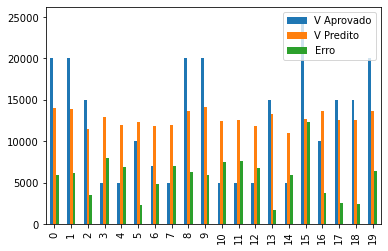

In [29]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
svr_rbf.fit(rescaledX, y_train)

rescaledTestX = scaler.transform(X_test)
predictions = svr_rbf.predict(rescaledTestX)


predictions=predictions.astype(int)
erros = np.absolute( y_test - predictions)
finalresult = pd.DataFrame({
        "V Aprovado": y_test,
        "V Predito": predictions,
        "Erro" : erros
    })

finalresult.head(20).plot(kind='bar')

finalresult.to_csv("predicted2.csv", index=False)

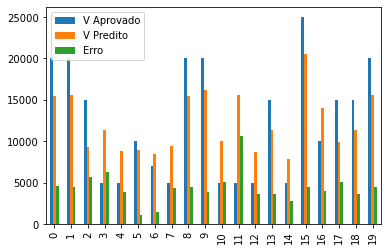

In [30]:


ada = AdaBoostRegressor()
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
ada.fit(rescaledX, y_train)

rescaledTestX = scaler.transform(X_test)
predictions = ada.predict(rescaledTestX)

predictions=predictions.astype(int)
erros = np.absolute( y_test - predictions)
finalresult = pd.DataFrame({
        "V Aprovado": y_test,
        "V Predito": predictions,
        "Erro" : erros
    })

finalresult.head(20).plot(kind='bar')

finalresult.to_csv("predicted2.csv", index=False)

<AxesSubplot:>

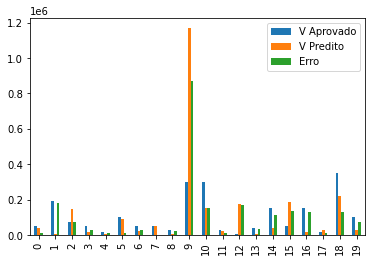

In [26]:
y_pred = model.predict(X_test)
predictions=y_pred[:,0]
predictions=predictions.astype(int)
erros = np.absolute( y_test - predictions)
finalresult = pd.DataFrame({
        "V Aprovado": y_test,
        "V Predito": predictions,
        "Erro" : erros
    })

finalresult.head(20).plot(kind='bar')


In [32]:
print(median_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

2479.92919921875
23458932.770895626


<AxesSubplot:>

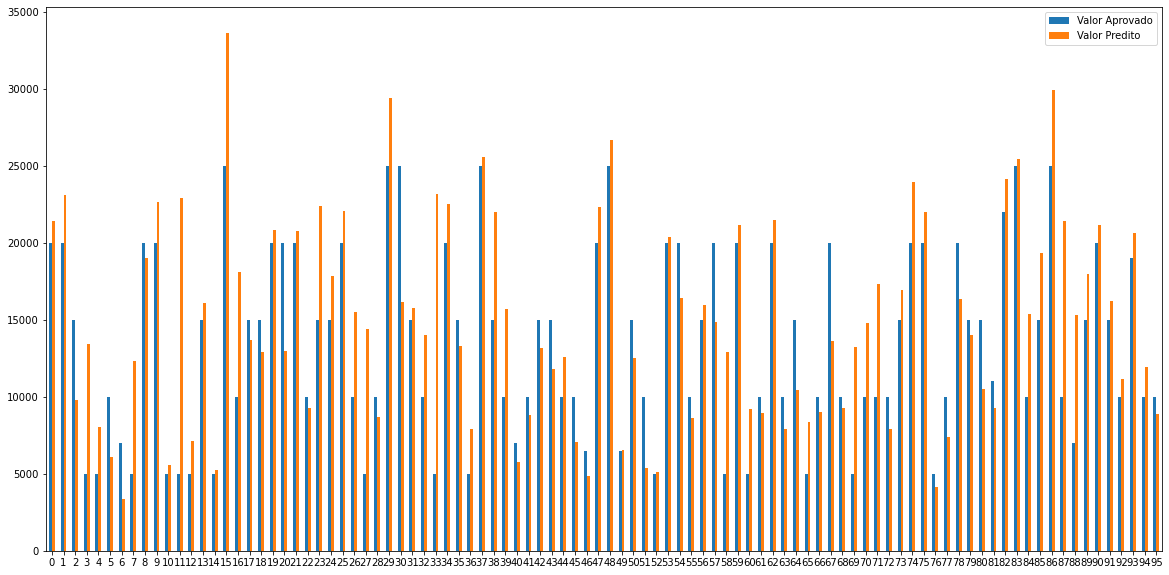

In [33]:
dfresult = pd.DataFrame({
        "Valor Aprovado": y_test,
        "Valor Predito": y_pred[:,0]
    })
dfresult.plot.bar(rot=0, figsize = (20,10))